 ##### Importation of Necessary Libraries to Perform Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sml 

#### Importation of data

In [2]:
Mdf= pd.read_csv(r"C:\Users\User\Desktop\PYTHON\DATA\Multiple Linear Regression (Dummy).csv")

In [3]:
Mdf.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
Mdf.shape

(50, 5)

The data consist of 50 samples and 5 attribute 

In [5]:
Mdf.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

From the above summary of the categories of State present in the data clearly shows that there are 3 states which are New York which constitue of 17 samples, California whic constitute of 17 observations and Florida with 16 observations 

In [6]:
Mdf.isnull().value_counts()

R&D Spend  Administration  Marketing Spend  State  Profit
False      False           False            False  False     50
dtype: int64

In [7]:
St= Mdf['State'].value_counts()
St

New York      17
California    17
Florida       16
Name: State, dtype: int64

From the above result it shows that there is no missing value in the data 

#### Visualization  

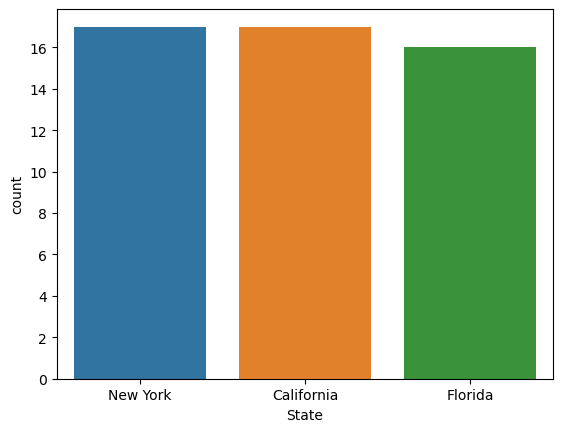

In [8]:
sns.countplot(x="State",data=Mdf)
plt.show()


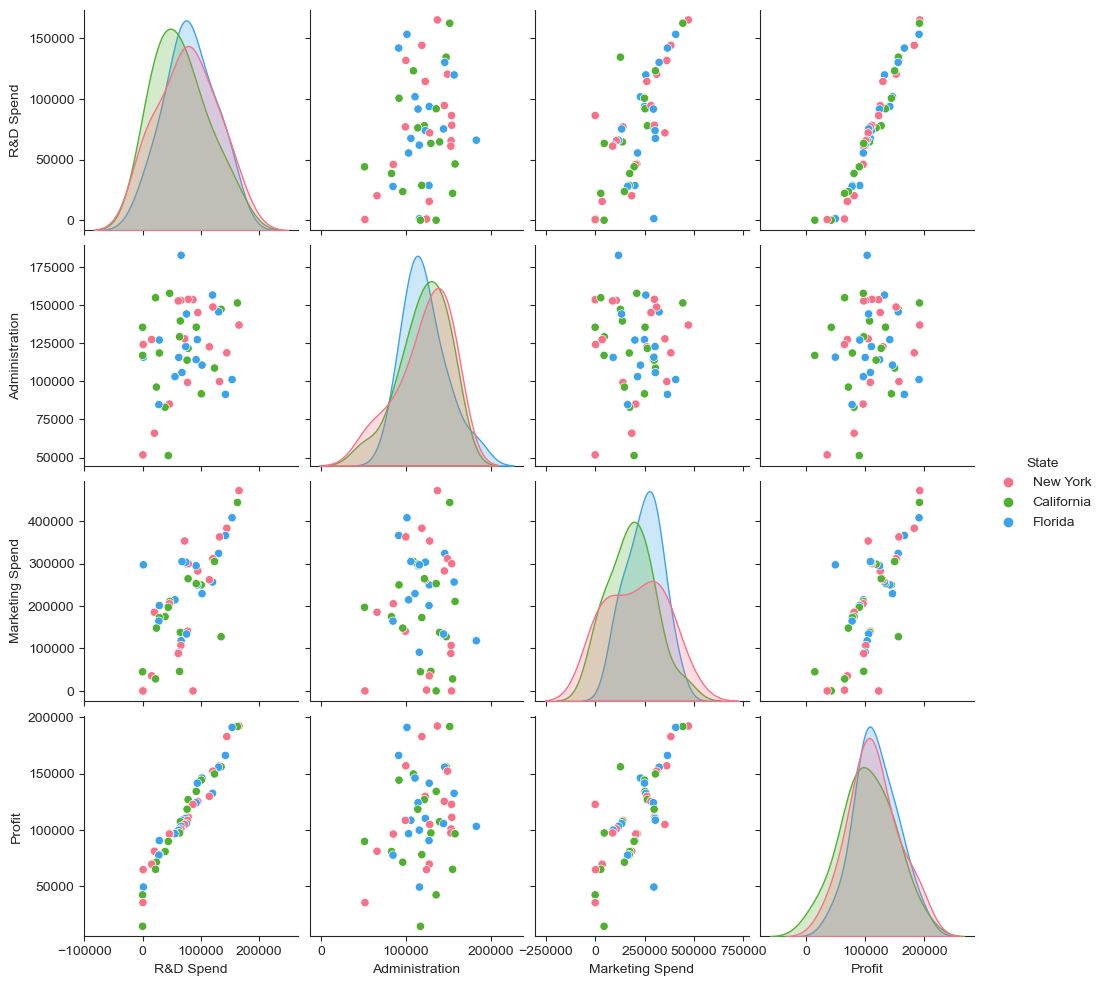

In [9]:
sns.set_style("ticks")
sns.pairplot(Mdf,hue='State',diag_kind="kde",kind="scatter",palette="husl")
plt.show()


In [10]:
cor= Mdf[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()
cor

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


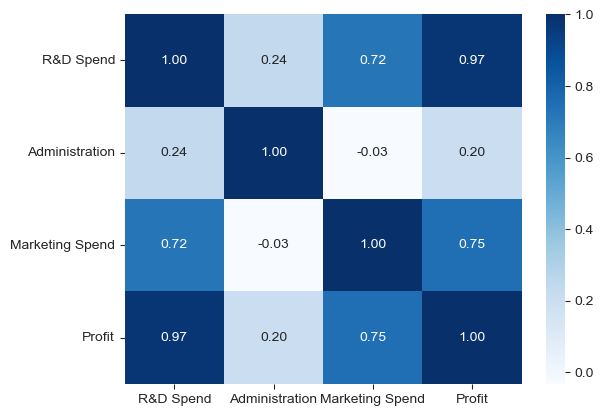

In [11]:
sns.heatmap(cor,cmap='Blues', annot=True, fmt=".2f")
plt.show()

From the correlation table above and the visualization it shows that there is a very strong correlation between R&D spend and the profit with 97% association, and 75% correlation between Profit and Marketing speed while all other attributes are weak correlations 

In [12]:
Mdf.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
Mdf['State'].describe()

count           50
unique           3
top       New York
freq            17
Name: State, dtype: object

#### Categorical variable encoding

In [14]:
l = LabelEncoder()
le= l.fit_transform(Mdf['State'])

In [15]:
le

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

From the label encoder transformation, it has categorised each of the country to 0,1,2 by ranking which is appriopriate for the ordinal variable therefore the OneHotEncoder will be replaced 

In [16]:
df_one_hot = pd.get_dummies(Mdf, columns=['State'], prefix='category')

df_one_hot.head()


,R&D Spend,Administration,Marketing Spend,Profit,category_California,category_Florida,category_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [17]:
X= df_one_hot[['R&D Spend', 'Administration', 'Marketing Spend', 
       'category_California', 'category_Florida']].values
y=df_one_hot['Profit'].values
## WE NEED TO AVOID ONE COLUMN IN ORDER NOT TO FALL IN DUMMY TRAP

#### By using machine learning method 

In [18]:
OL = OneHotEncoder()
X = Mdf.iloc[:,:-1].values
y= Mdf.iloc[:,4].values

In [19]:
a= OL.fit_transform(X[:,[3]]).toarray()
a=a[:,1:]
X=X[:,:3]
X= np.concatenate((X,a),axis=1) 


#### Splitting the daata into training set and test set

In [20]:
X_train, X_test, y_train,y_test =train_test_split(X,y, random_state=0)

In [21]:
X_train.shape

(37, 5)

In [22]:
y_train.shape

(37,)

In [23]:
X_test.shape

(13, 5)

In [24]:
y_test.shape

(13,)

#### Model Training using linear regression

In [25]:
LR = LinearRegression()
MLR =LR.fit(X_train,y_train)
ped = MLR.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
print("Training set score: {:.2f}".format(LR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(LR.score(X_test, y_test)))
mse = mean_squared_error(y_test, ped)
r2 = r2_score(y_test, ped)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Training set score: 0.95
Test set score: 0.93
Mean Squared Error: 73809312.88230096
R-squared: 0.9315815199152061


FEATURES SELECTION USING WRAPEED METHOD (FORWARD SELECTION AND BACKWARD ELIMINATION)

In [27]:
#adding coulmn 1' s in x 
import statsmodels.api as sml
X= np.append(arr =np.ones((50,1)).astype(int),values=X,axis=1)

In [41]:
X_opt1 =np.array(X[:,[0,1,2,3,4,5]],dtype=float)
X1_train,X1_test,y1_train,y1_test = train_test_split(X_opt1,y, random_state=0)
reg_ols1=sml.OLS(endog=y1_train,exog=X1_train).fit()
print (reg_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     120.8
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           2.27e-19
Time:                        14:44:52   Log-Likelihood:                -390.48
No. Observations:                  37   AIC:                             793.0
Df Residuals:                      31   BIC:                             802.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.105e+04   8872.115      4.627      0.0

## From the above the highest P-values is X5 which is index 5 therefore it is removed 

In [42]:

## Backward Elimination method
X_opt2 =np.array(X[:,[0,1,2,3,4]],dtype=float)
X2_train,X2_test,y2_train,y2_test = train_test_split(X_opt2,y, random_state=0)
reg_ols2=sml.OLS(endog=y2_train,exog=X2_train).fit()
print (reg_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     155.8
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           1.69e-20
Time:                        14:45:42   Log-Likelihood:                -390.48
No. Observations:                  37   AIC:                             791.0
Df Residuals:                      32   BIC:                             799.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.105e+04   8591.705      4.778      0.0

## From the above th highest P-values as well is 0.940 which is x4 which belongs to index 4 so index 4 is removed as well 

In [43]:
## Backward Elimination method
X3_opt =np.array(X[:,[0,1,2,3]],dtype=float)
X3_train,X3_test,y3_train,y3_test = train_test_split(X3_opt,y, random_state=0)
reg_ols3=sml.OLS(endog=y3_train,exog=X3_train).fit()
print (reg_ols3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           1.07e-21
Time:                        14:47:11   Log-Likelihood:                -390.49
No. Observations:                  37   AIC:                             789.0
Df Residuals:                      33   BIC:                             795.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.108e+04   8459.839      4.856      0.0

## from the above the x2 has the highest P-value greater than 0.05 therefoe it will be removed which is index 2

In [45]:
X4_opt =np.array(X[:,[0,1,3]],dtype=float)
X4_train,X4_test,y4_train,y4_test = train_test_split(X4_opt,y, random_state=0)
reg_ols4=sml.OLS(endog=y4_train,exog=X4_train).fit()
print (reg_ols4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     326.4
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           6.43e-23
Time:                        14:49:14   Log-Likelihood:                -390.74
No. Observations:                  37   AIC:                             787.5
Df Residuals:                      34   BIC:                             792.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.626e+04   3123.935     14.809      0.0

In [46]:
## Backward Elimination method
X_opt5 =np.array(X[:,[0,1]],dtype=float)
X5_train,X5_test,y5_train,y5_test = train_test_split(X_opt5,y, random_state=0)
reg_ols5=sml.OLS(endog=y5_train,exog=X5_train).fit()
print (reg_ols5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     620.6
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           7.38e-24
Time:                        14:50:12   Log-Likelihood:                -392.13
No. Observations:                  37   AIC:                             788.3
Df Residuals:                      35   BIC:                             791.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.81e+04   2984.636     16.114      0.0

In [48]:
X_opt6 =np.array(X[:,[0,1,2]],dtype=float)
X6_train,X6_test,y6_train,y6_test = train_test_split(X_opt6,y, random_state=0)
reg_ols6=sml.OLS(endog=y6_train,exog=X6_train).fit()
print (reg_ols6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     302.2
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           2.23e-22
Time:                        14:51:27   Log-Likelihood:                -392.09
No. Observations:                  37   AIC:                             790.2
Df Residuals:                      34   BIC:                             795.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.593e+04   8207.405      5.597      0.0

In [49]:
## Forward Selection method
X_opt7 =np.array(X[:,[0,1,2,3]],dtype=float)
X7_train,X7_test,y7_train,y7_test = train_test_split(X_opt7,y, random_state=0)
reg_ols7=sml.OLS(endog=y7_train,exog=X7_train).fit()
print (reg_ols7.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           1.07e-21
Time:                        14:53:19   Log-Likelihood:                -390.49
No. Observations:                  37   AIC:                             789.0
Df Residuals:                      33   BIC:                             795.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.108e+04   8459.839      4.856      0.0

In [51]:
## Forward Selection method
X_opt8 =np.array(X[:,[0,1,3]],dtype=float)
X8_train,X8_test,y8_train,y8_test = train_test_split(X_opt8,y, random_state=0)
reg_ols8=sml.OLS(endog=y8_train,exog=X8_train).fit()
print (reg_ols8.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     326.4
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           6.43e-23
Time:                        14:58:41   Log-Likelihood:                -390.74
No. Observations:                  37   AIC:                             787.5
Df Residuals:                      34   BIC:                             792.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.626e+04   3123.935     14.809      0.0

## Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.93


## Lasso regression

In [54]:
import numpy as np
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.93


# Summary of findings 

The above result of the feature selection and extraction using 
the wrapped method (Backward Elimination MethForward Selection method) 
and Embedded method (Ridge Regression and the Lasso Regression) shows non significant difference between the linear regresion model and the Embedded method (Ridge Regression and the Lasso Regression) with the same R-squared value while the embedded method ((Backward Elimination MethForward Selection method) contribute to the accuracy of the model which ought to be 0.95 and the findings shows a significant relationship between the features (R&D spend and the Marketing) and the profit made which are the features that contribute to the profit made 